In [1]:
import numpy as np
import cv2 as cv
from lic import *
import os

In [2]:
test_img = '../images/raw/Angela_Lansbury_0002.jpg'

In [3]:
img = cv.imread(test_img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [13]:
labels, label_counts = label_regions(img_lab, img_lab.shape[0] * img_lab.shape[1] // 8)
vec = extract_region_vector_field(img_gray, labels, label_counts)
im_noise = generate_noise_image(img_gray, labels, label_counts)

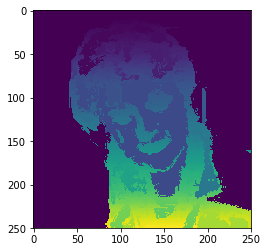

In [14]:
plt.imshow(labels)

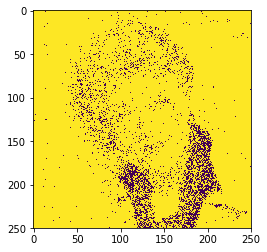

In [17]:
plt.imshow(im_noise)

In [23]:
KWs = [3, 4, 5, 6, 7]
im_sketchs = [line_integral_convolution(im_noise, vec, KW=KW, use_tqdm=True) for KW in KWs]

100%|██████████| 62500/62500 [03:28<00:00, 299.73it/s]


In [24]:
rawdir, filename = os.path.split(test_img)
base, ext = os.path.splitext(filename)
imagesdir, _ = os.path.split(rawdir)
outdir = os.path.join(imagesdir, 'kw_exp')

if not os.path.exists(outdir):
    os.makedirs(outdir)

for KW, im_sketch in zip(KWs, im_sketchs):
    cv.imwrite(os.path.join(outdir, '{}_KW_{}{}'.format(base, KW, ext)), im_sketch)